## Import Packages

In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

## Load Training Dataset

In [5]:
# Function to prepare the data
def prepare_data(data_dir):
    dataframes = []
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            df = pd.read_csv(os.path.join(data_dir, filename))
            # Drop the "cycle index" column
            df = df.drop(columns=['Cycle_Index'], errors='ignore')
            dataframes.append(df)
    
    # Drop highly correlated features
    combined_data = pd.concat(dataframes, axis=0, ignore_index=True)
    corr_matrix = combined_data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    for i in range(len(dataframes)):
        dataframes[i] = dataframes[i].drop(columns=to_drop)
    
    return dataframes, to_drop

In [6]:
# Load and prepare the data
data_dir = 'E:\\Features_Dataset'
dataframes, to_drop = prepare_data(data_dir)

## Split into Training and Validation Sets

In [7]:
# Split the dataframes for training and validation
train_dataframes = dataframes[:80]
val_dataframes = dataframes[80:]

In [8]:
# Standardize and transform the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [9]:
X_train = np.concatenate([scaler_X.fit_transform(df.drop(columns=['Nominal_Capacity'])) for df in train_dataframes])
y_train = np.concatenate([scaler_y.fit_transform(df['Nominal_Capacity'].values.reshape(-1, 1)) for df in train_dataframes]).ravel()
X_val = np.concatenate([scaler_X.transform(df.drop(columns=['Nominal_Capacity'])) for df in val_dataframes])
y_val = np.concatenate([scaler_y.transform(df['Nominal_Capacity'].values.reshape(-1, 1)) for df in val_dataframes]).ravel()

## Train the Model

In [10]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
## Load Testing Data

In [11]:
# Function to prepare testing data
def prepare_test_data(test_data_dir, scaler_X, to_drop):
    test_dataframes = []
    for filename in os.listdir(test_data_dir):
        if filename.endswith('.csv'):
            df = pd.read_csv(os.path.join(test_data_dir, filename))
            # Drop the "cycle index" column
            df = df.drop(columns=['Cycle_Index'], errors='ignore')
            df = df.drop(columns=to_drop)
            test_dataframes.append(df)
    test_data = pd.concat(test_dataframes, axis=0, ignore_index=True)
    X_test = test_data.drop(columns=['Nominal_Capacity'])
    y_test = test_data['Nominal_Capacity']
    X_test_scaled = scaler_X.transform(X_test)
    return X_test_scaled, y_test.values

In [12]:
# Load and prepare the testing data
test_data_dir = 'E:\\Testing Data'
X_test, y_test = prepare_test_data(test_data_dir, scaler_X, to_drop)

In [13]:
# Make predictions on the entire testing dataset
predictions_scaled = rf_model.predict(X_test)
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))
y_test_descaled = y_test.reshape(-1, 1)

In [14]:
# Evaluate the model on testing data
mae = mean_absolute_error(y_test_descaled, predictions)
rmse = np.sqrt(mean_squared_error(y_test_descaled, predictions))
mape = np.mean(np.abs((y_test_descaled - predictions) / y_test_descaled)) * 100
r2 = r2_score(y_test_descaled, predictions)

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

MAE: 0.0108
RMSE: 0.0159
MAPE: 1.0423%
R-squared: 0.8551


Plot saved to C:\Users\Rishi\Documents\Images\RF_Pred_All_Data


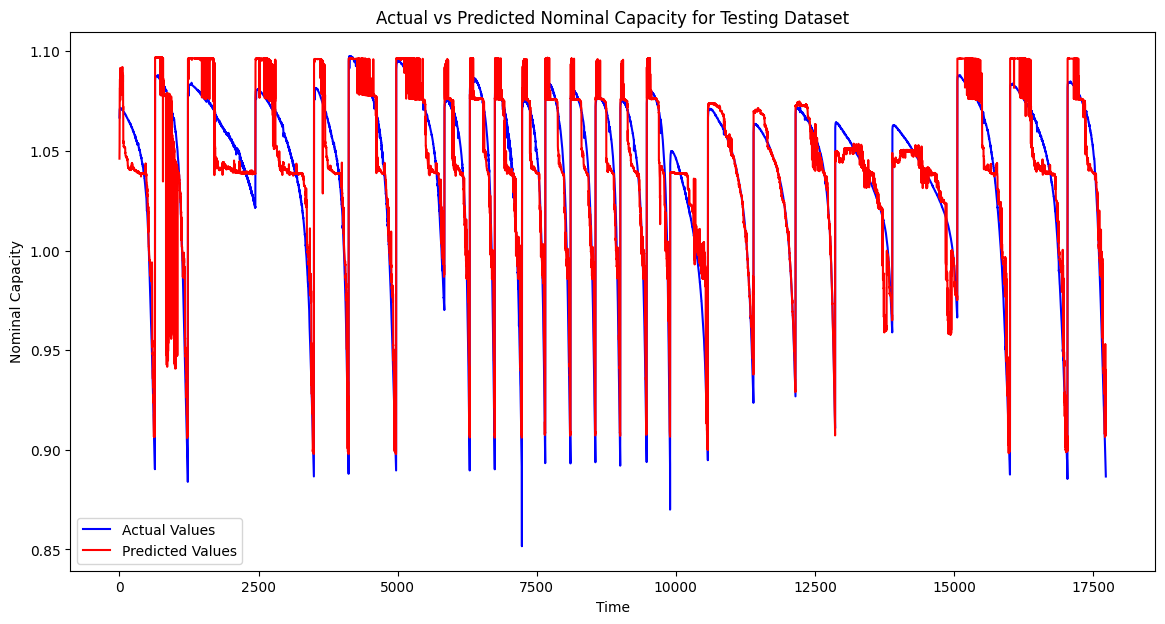

In [15]:
# Plot the actual vs predicted values for the entire testing dataset
plt.figure(figsize=(14, 7))
plt.plot(y_test_descaled, label='Actual Values', color='b')
plt.plot(predictions, label='Predicted Values', color='r')
plt.title('Actual vs Predicted Nominal Capacity for Testing Dataset')
plt.xlabel('Time')
plt.ylabel('Nominal Capacity')
plt.legend()

# Save the plot if save_path is provided
save_path = 'C:\\Users\\Rishi\\Documents\\Images\\RF_Pred_All_Data'

if save_path:
    plt.savefig(save_path)
    print(f"Plot saved to {save_path}")

plt.show()

In [16]:
# Load a specific testing dataset
specific_test_df = pd.read_csv('E:\\Testing Data\\Battery_115_Features.csv')

In [17]:
# Drop the "cycle index" column and highly correlated features
specific_test_df = specific_test_df.drop(columns=['Cycle_Index'], errors='ignore')
specific_test_df = specific_test_df.drop(columns=to_drop)

In [18]:
# Separate features and target
X_specific_test = specific_test_df.drop(columns=['Nominal_Capacity'])
y_specific_test = specific_test_df['Nominal_Capacity']

In [19]:
# Scale the features
X_specific_test_scaled = scaler_X.transform(X_specific_test)

In [20]:
# Make predictions
predictions_specific_scaled = rf_model.predict(X_specific_test_scaled)
predictions_specific = scaler_y.inverse_transform(predictions_specific_scaled.reshape(-1, 1))
y_specific_test_descaled = y_specific_test.values.reshape(-1, 1)

Plot saved to C:\Users\Rishi\Documents\Images\RF_Pred_Single_Data


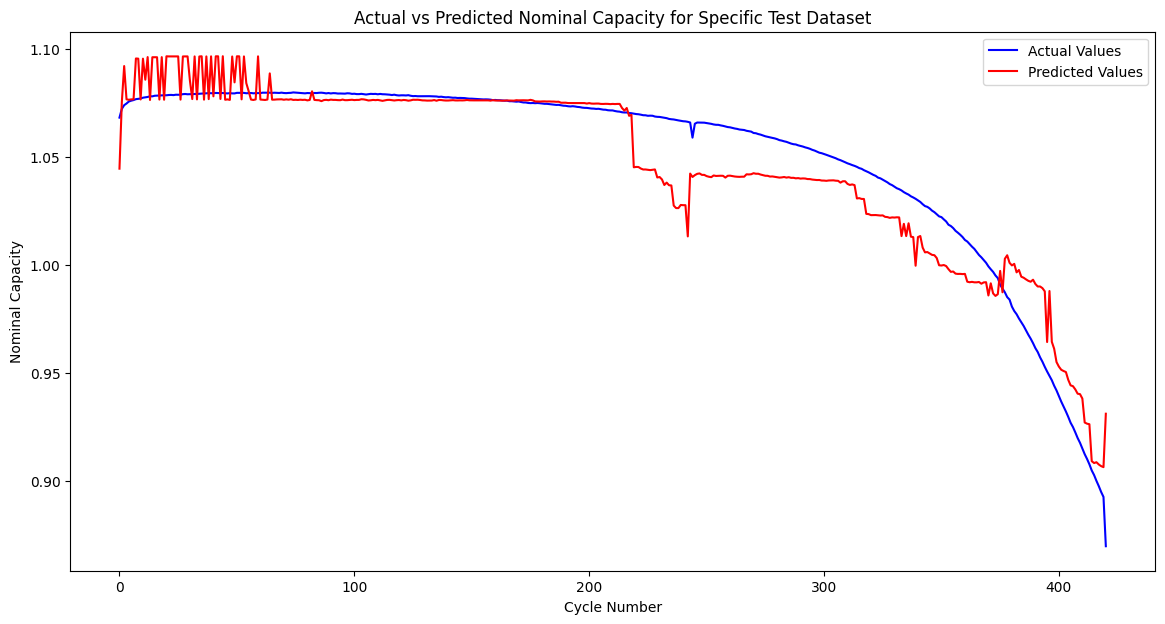

In [21]:
# Plot the actual vs predicted values for the specific test dataset
plt.figure(figsize=(14, 7))
plt.plot(y_specific_test_descaled, label='Actual Values', color='b')
plt.plot(predictions_specific, label='Predicted Values', color='r')
plt.title('Actual vs Predicted Nominal Capacity for Specific Test Dataset')
plt.xlabel('Cycle Number')
plt.ylabel('Nominal Capacity')
plt.legend()

# Save the plot if save_path is provided
save_path = 'C:\\Users\\Rishi\\Documents\\Images\\RF_Pred_Single_Data'

if save_path:
    plt.savefig(save_path)
    print(f"Plot saved to {save_path}")

plt.show()

In [22]:
mae = mean_absolute_error(y_specific_test_descaled, predictions_specific)
rmse = np.sqrt(mean_squared_error(y_specific_test_descaled, predictions_specific))
mape = np.mean(np.abs((y_specific_test_descaled - predictions_specific) / y_specific_test_descaled)) * 100
r2 = r2_score(y_specific_test_descaled, predictions_specific)

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

MAE: 0.0116
RMSE: 0.0155
MAPE: 1.1276%
R-squared: 0.8745
